In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Veri setini yükleyin
data_path = 'E:\projects\MLProject_sonar\data\sonar.csv'
data = pd.read_csv(data_path, header=None)

In [3]:
# Sütun isimlerini ayarlayın
feature_names = [f'feature_{i}' for i in range(1, 61)]
data.columns = feature_names + ['target']

In [4]:
# Eksik veri kontrolü
print(data.isnull().sum())


feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
             ..
feature_57    0
feature_58    0
feature_59    0
feature_60    0
target        0
Length: 61, dtype: int64


In [5]:
# Temel istatistiksel bilgiler
print(data.describe())

        feature_1   feature_2   feature_3   feature_4   feature_5   feature_6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

        feature_7   feature_8   feature_9  feature_10  ...  feature_51  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

In [6]:
# Hedef değişkenin sınıf dağılımını kontrol edin
print(data['target'].value_counts())

target
M    111
R     97
Name: count, dtype: int64


In [8]:
# Aykırı değerleri tespit etme ve filtreleme
# Hedef sütunu dışında işlem yap
data_numeric = data[feature_names]  # Sadece sayısal özellikleri al
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri filtrele
mask = ~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
data_filtered = data_numeric[mask]
data_filtered['target'] = pd.Series(data['target'][mask].values, index=data_filtered.index)

print(f'Original data: {data.shape}, Filtered data: {data_filtered.shape}')

Original data: (208, 61), Filtered data: (134, 61)


C:\Users\ecanm\AppData\Local\Temp\ipykernel_14532\4117399082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['target'] = pd.Series(data['target'][mask].values, index=data_filtered.index)


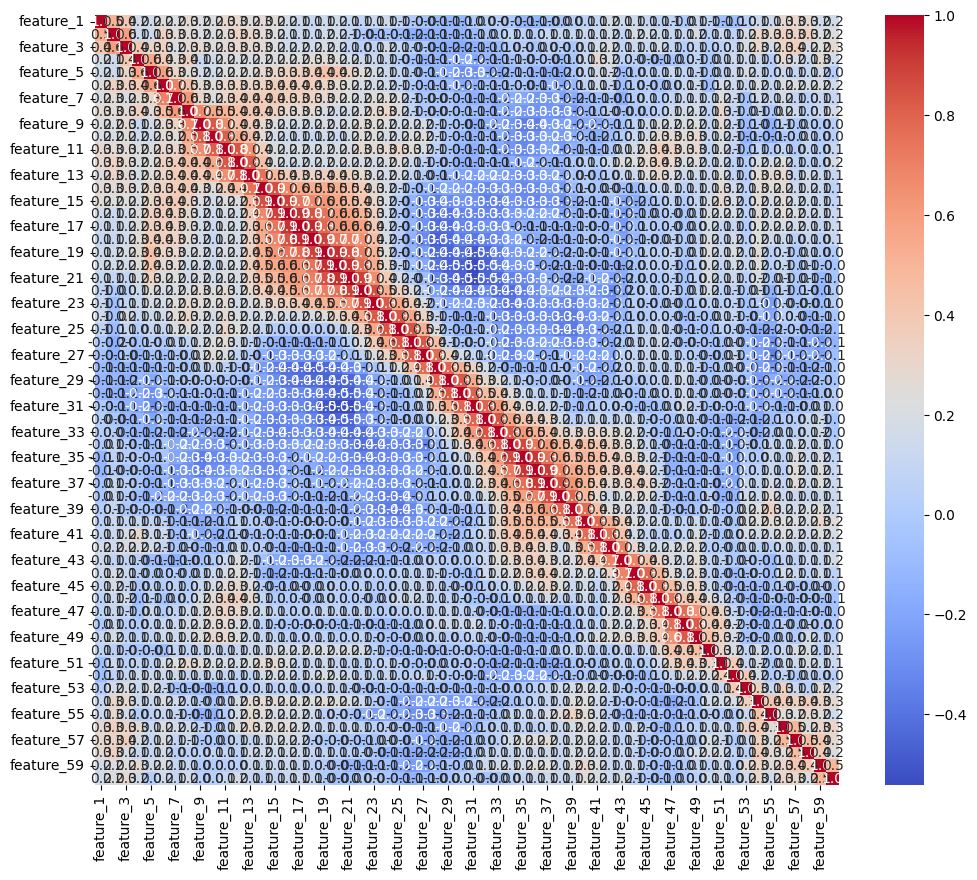

In [10]:
# Korelasyon matrisi
plt.figure(figsize=(12, 10))
sns.heatmap(data_filtered[feature_names].corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.show()


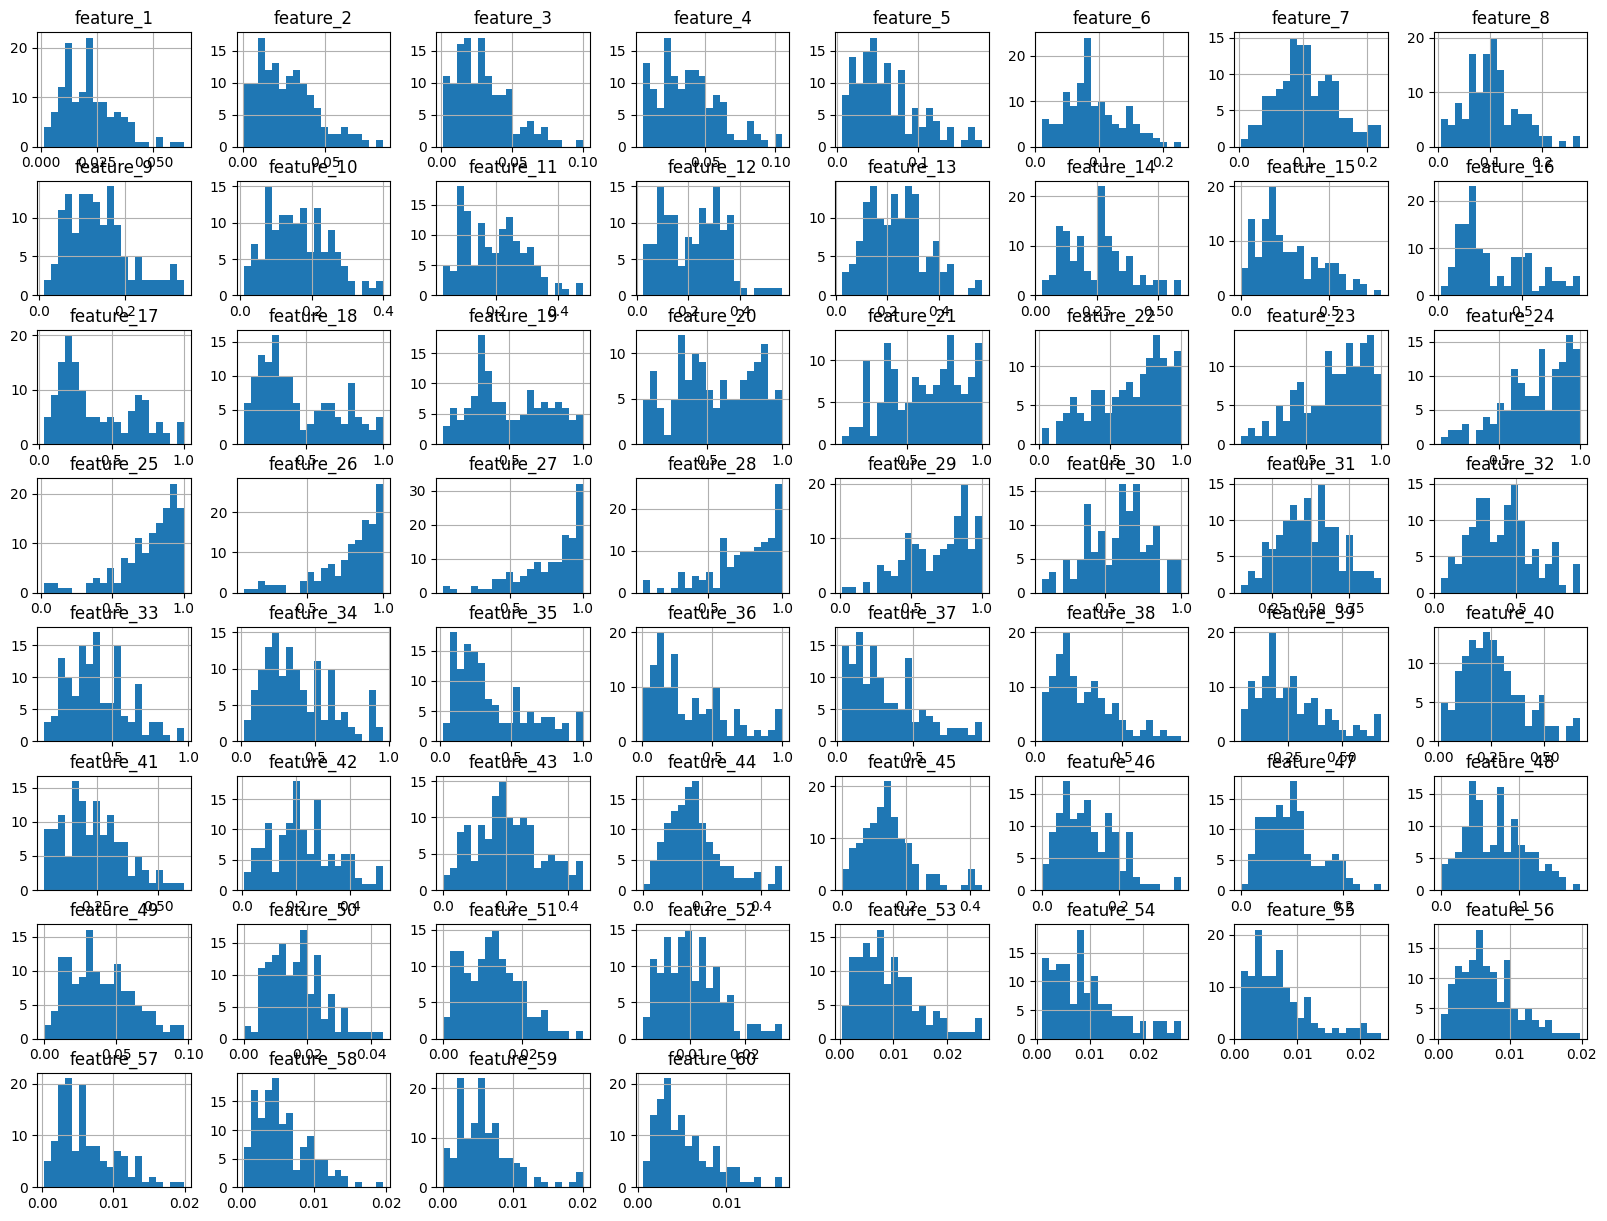

In [11]:
# Veri setindeki dağılımları görselleştirme
data_filtered[feature_names].hist(figsize=(20, 15), bins=20)
plt.show()

In [12]:
# Korelasyon matrisini hesaplama
correlation_matrix = data_filtered[feature_names].corr()
print(correlation_matrix)


            feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
feature_1    1.000000   0.514285   0.393992   0.173930   0.162578   0.239019   
feature_2    0.514285   1.000000   0.592234   0.148270   0.145706   0.341787   
feature_3    0.393992   0.592234   1.000000   0.398019   0.299087   0.335938   
feature_4    0.173930   0.148270   0.398019   1.000000   0.559051   0.388218   
feature_5    0.162578   0.145706   0.299087   0.559051   1.000000   0.596087   
feature_6    0.239019   0.341787   0.335938   0.388218   0.596087   1.000000   
feature_7    0.207426   0.256750   0.195141   0.270198   0.309109   0.695959   
feature_8    0.276933   0.257122   0.277187   0.350328   0.253311   0.462977   
feature_9    0.213454   0.211849   0.281853   0.125126   0.176554   0.275225   
feature_10   0.207798   0.202900   0.237319   0.150552   0.154235   0.252096   
feature_11   0.290873   0.255738   0.250007   0.217702   0.232519   0.301809   
feature_12   0.283382   0.329782   0.282

In [17]:
# Korelasyon matrisini hesapla
corr_matrix = data_filtered[feature_names].corr()

# Yüksek korelasyonlu özellik çiftlerini tespit et
high_corr_var = np.where(abs(corr_matrix) > 0.8)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Yüksek korelasyonlu özellik çiftlerini göster
for var_pair in high_corr_var:
    print(var_pair)



('feature_9', 'feature_10')
('feature_10', 'feature_11')
('feature_11', 'feature_12')
('feature_12', 'feature_13')
('feature_14', 'feature_15')
('feature_15', 'feature_16')
('feature_16', 'feature_17')
('feature_16', 'feature_18')
('feature_17', 'feature_18')
('feature_18', 'feature_19')
('feature_19', 'feature_20')
('feature_19', 'feature_21')
('feature_20', 'feature_21')
('feature_21', 'feature_22')
('feature_22', 'feature_23')
('feature_23', 'feature_24')
('feature_24', 'feature_25')
('feature_25', 'feature_26')
('feature_26', 'feature_27')
('feature_29', 'feature_30')
('feature_32', 'feature_33')
('feature_33', 'feature_34')
('feature_34', 'feature_35')
('feature_35', 'feature_36')
('feature_36', 'feature_37')
('feature_37', 'feature_38')
('feature_48', 'feature_49')


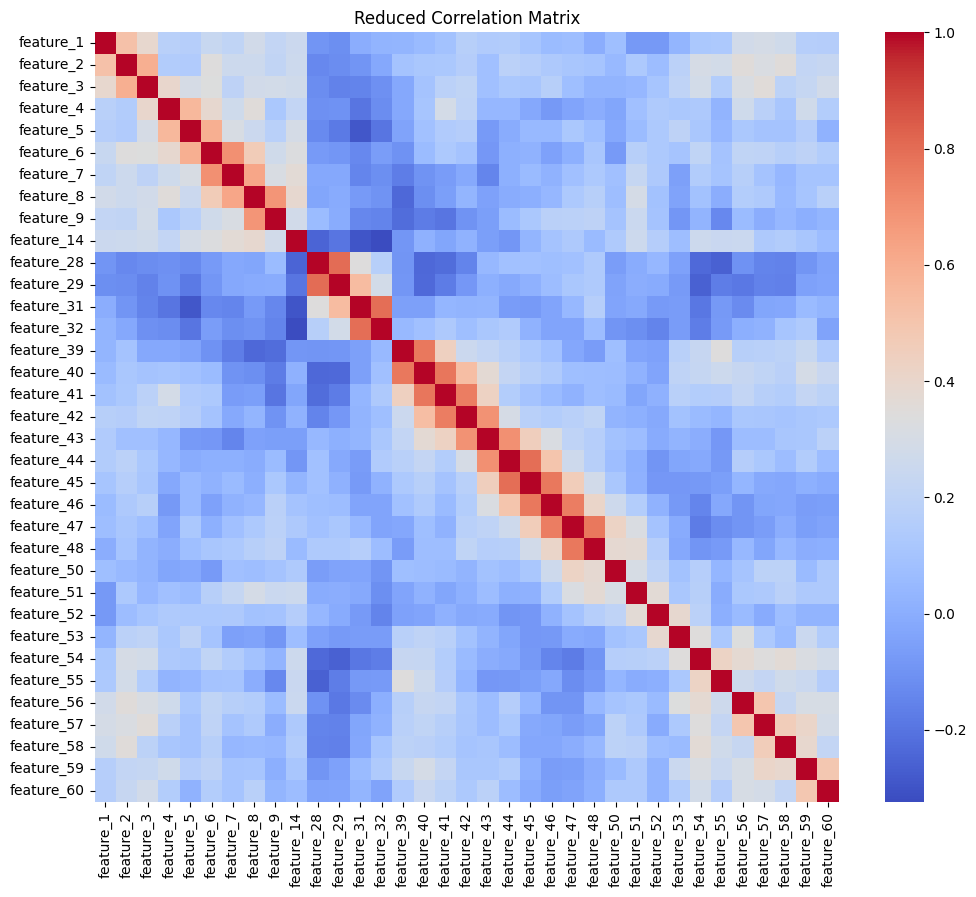

Removed 25 features.
Data shape after feature removal: (134, 36)
Removed features:
['feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_30', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_49']


In [20]:
# Çıkarılacak özelliklerin listesini oluştur
features_to_remove = set([pair[1] for pair in high_corr_var])

# Veri setinden bu özellikleri çıkar
data_reduced = data_filtered.drop(columns=features_to_remove)

# Çıkarılan özelliklerle güncellenmiş korelasyon matrisini kontrol et
# Hedef sütunu ('target') hariç tutarak korelasyon matrisini hesapla
feature_columns = [col for col in data_reduced.columns if col != 'target']
corr_matrix_reduced = data_reduced[feature_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_reduced, annot=False, cmap='coolwarm')
plt.title('Reduced Correlation Matrix')
plt.show()

# Çıkarılan özellik sayısını ve veri setinin yeni boyutlarını göster
print(f"Removed {len(features_to_remove)} features.")
print(f"Data shape after feature removal: {data_reduced.shape}")

# Çıkarılan özellikleri göster
print("Removed features:")
print(sorted(features_to_remove))




In [23]:
# Veri setini CSV olarak kaydet
output_file_path = 'E:/projects/MLProject_sonar/data/processed/reduced_features_data.csv'
data_reduced.to_csv(output_file_path, index=False)  # index=False, DataFrame indekslerinin dosyaya kaydedilmemesini sağlar

print(f"Data saved successfully to {output_file_path}")



Data saved successfully to E:/projects/MLProject_sonar/data/processed/reduced_features_data.csv
